In [1]:
%cd ~/Research/goingBALD
%load_ext autoreload
%autoreload 2

/home/minh/Research/goingBALD


In [2]:
import json
import os
import torch
import matplotlib.pyplot as plt

In [3]:
EXPERIMENTS_DIR = '/home/minh/Research/goingBALD/experiments/conll2003_BALD_sampler_2020-11-08_23:37:09'

In [4]:
with open(os.path.join(EXPERIMENTS_DIR, "experiment_args.txt")) as f:
    args_dict = json.load(f)

In [5]:
from collections import namedtuple
Args = namedtuple("Args", [key for key in args_dict])
args = Args(**args_dict)

In [8]:
from bald.conll_experiment_manager import (
    RandomExperimentManager,
    MNLPExperimentManager,
    DropoutBALDExperimentManager,
)
manager = DropoutBALDExperimentManager(args, save_exp=False)

In [ ]:
model = manager.get_model()
model.load_state_dict(
    torch.load(os.path.join(EXPERIMENTS_DIR, )))

In [7]:
f_scores = []
for i in range(1, args.al_epochs+1):
    model = manager.get_model()
    model.load_state_dict(torch.load(os.path.join(EXPERIMENTS_DIR, f"model_AL_epoch_{i}.pt")))
    manager.model = model
    _, f_score = manager.evaluate_model_step()
    f_scores.append(f_score)

/home/minh/.virtualenvs/goingBALD/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


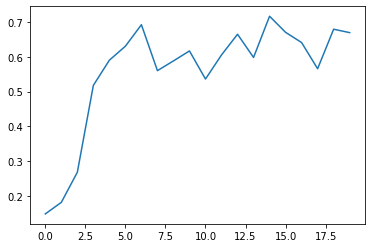

In [8]:
plt.plot(range(args.al_epochs), f_scores)

In [48]:
EXPERIMENTS_DIR = '/home/minh/Research/goingBALD/experiments/conll2003_random_sampler_DEBUG'

In [49]:
with open(os.path.join(EXPERIMENTS_DIR, "experiment_args.txt")) as f:
    args_dict = json.load(f)

from collections import namedtuple
Args = namedtuple("Args", [key for key in args_dict])
args = Args(**args_dict)

In [50]:
from bald.conll_experiment_manager import (
    RandomExperimentManager,
)
random_manager = RandomExperimentManager(args, save_exp=False)

In [52]:
random_f_scores = []
for i in range(1, args.al_epochs+1):
    model = manager.get_model()
    model_path = os.path.join(EXPERIMENTS_DIR, f"model_AL_epoch_{i}.pt")
    print(model_path)
    model.load_state_dict(torch.load(model_path))
    random_manager.model = model
    _, f_score = random_manager.evaluate_model_step()
    print(f_score)
    random_f_scores.append(f_score)

/home/minh/Research/goingBALD/experiments/conll2003_random_sampler_DEBUG/model_AL_epoch_1.pt
0.18988108901971468
/home/minh/Research/goingBALD/experiments/conll2003_random_sampler_DEBUG/model_AL_epoch_2.pt
0.09754270455760497


In [26]:
for i in range(5):
    _, f_score = random_manager.evaluate_model_step()
    print(f_score)


0.014721762374778596
0.014463468399675652
0.014763969467029993
0.014434181103961734
0.014140084884988467


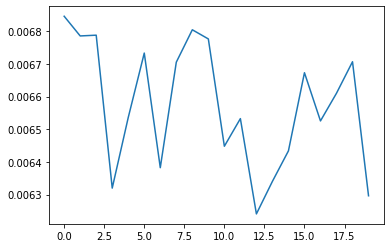

In [49]:
plt.plot(range(args.al_epochs), random_f_scores)

Text(0.5, 1.0, 'AL Epoch v F Score')

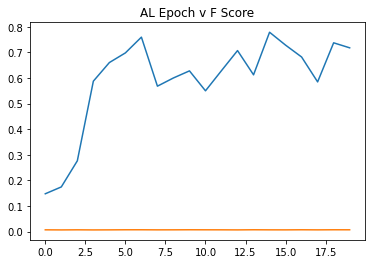

In [34]:
fig, ax = plt.subplots()
ax.plot(range(args.al_epochs), f_scores)
ax.plot(range(args.al_epochs), random_f_scores)
ax.set_title('AL Epoch v F Score')